<a href="https://colab.research.google.com/github/sen-com/NLP-100-knokes-cp7/blob/main/68_Ward%E6%B3%95%E3%81%AB%E3%82%88%E3%82%8B%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E3%83%AA%E3%83%B3%E3%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．
FILE_ID = "0B7XkCwpI5KDYNlNUTTlSS21pQmM"
FILE_NAME = "GoogleNews-vectors-negative300.bin.gz"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=$FILE_ID' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$FILE_ID" -O $FILE_NAME && rm -rf /tmp/cookies.txt

--2020-11-17 05:15:56--  https://docs.google.com/uc?export=download&confirm=RAJ6&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
Resolving docs.google.com (docs.google.com)... 108.177.126.101, 108.177.126.138, 108.177.126.113, ...
Connecting to docs.google.com (docs.google.com)|108.177.126.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-ag-docs.googleusercontent.com/docs/securesc/f47b808q0l1prbiic2ii1r9t6fel520d/8mb5f0inkb7gr6ap7cr0nkq9v2rtqtk7/1605590100000/06848720943842814915/15078377848264474882Z/0B7XkCwpI5KDYNlNUTTlSS21pQmM?e=download [following]
--2020-11-17 05:15:57--  https://doc-08-ag-docs.googleusercontent.com/docs/securesc/f47b808q0l1prbiic2ii1r9t6fel520d/8mb5f0inkb7gr6ap7cr0nkq9v2rtqtk7/1605590100000/06848720943842814915/15078377848264474882Z/0B7XkCwpI5KDYNlNUTTlSS21pQmM?e=download
Resolving doc-08-ag-docs.googleusercontent.com (doc-08-ag-docs.googleusercontent.com)... 74.125.143.132, 2a00:1450:4013:c03::84
Connecting to doc-08-

In [ ]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', binary=True)

In [24]:
!wget http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
!unzip wordsim353.zip

--2020-11-17 08:38:34--  http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving www.gabrilovich.com (www.gabrilovich.com)... 208.97.177.37
Connecting to www.gabrilovich.com (www.gabrilovich.com)|208.97.177.37|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘wordsim353.zip’

wordsim353.zip      100%[===================>]  22.71K  --.-KB/s    in 0.08s   

2020-11-17 08:38:34 (270 KB/s) - ‘wordsim353.zip’ saved [23257/23257]

Archive:  wordsim353.zip
  inflating: combined.csv            
  inflating: set1.csv                
  inflating: set2.csv                
  inflating: combined.tab            
  inflating: set1.tab                
  inflating: set2.tab                
  inflating: instructions.txt        


In [25]:
!head -10 './combined.csv'

Word 1,Word 2,Human (mean)
love,sex,6.77
tiger,cat,7.35
tiger,tiger,10.00
book,paper,7.46
computer,keyboard,7.62
computer,internet,7.58
plane,car,5.77
train,car,6.31
telephone,communication,7.50


In [34]:
# 国名の取得
countries = set()
with open('./questions-words-add.txt') as f:
  for line in f:
    line = line.split()
    if line[0] in ['capital-common-countries', 'capital-world']:
      countries.add(line[2])
    elif line[0] in ['currency', 'gram6-nationality-adjective']:
      countries.add(line[1])
countries = list(countries)

In [36]:
countries.sort()

In [39]:
# 単語ベクトルの取得
countries_vec = [model[country] for country in countries]

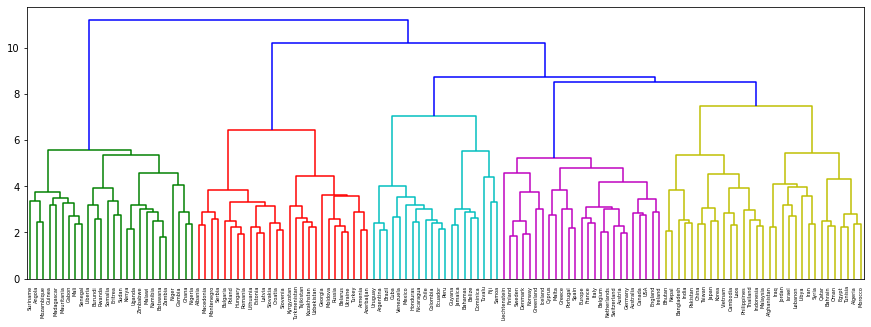

In [43]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(15, 5))
Z = linkage(countries_vec, method='ward')
dendrogram(Z, labels=countries)
plt.show()